# Part 1
Loading the digits dataset:

In [2]:
from sklearn.datasets import load_digits
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

digits_set = load_digits()
digits_df = DataFrame(data=digits_set.data, columns=digits_set.feature_names)

Data:

In [14]:
display(digits_df)
samples, features = digits_df.shape
print(f'This dataset contatins {features} features and {samples} samples.')
print(f"Range of values: [{np.min(digits_set.data)}, {np.max(digits_set.data)}]")
print(f"Scale of values: {np.max(digits_set.data)}")
print(f"Variance: {np.var(digits_set.data)}")

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


This dataset contatins 64 features and 1797 samples.
Range of values: [0.0, 16.0]
Scale of values: 16.0
Variance: 36.20173240585726


### Wild Guess
It seems like all the data may be integers. Let's check our assumption:

In [4]:
all_integers = np.any(np.mod(digits_set.data, 1) == 0)
print(f"Our theory is {all_integers}!")

Our theory is True!


## Basic Analysis:
- The features names go by 'pixel_i_j' where 0 <= i, j <= 7. 
- This may hint the data represents a 8 x 8 matrix, where each field contains information about it's corresponding pixel.
- All the samples being integers might mean they could correspond to enumerations. As the features named after pixels, we can assume those samples are each pixel's colour.

Let's split our data:

c:\Users\niv19\machine learning\ml-assignment-1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


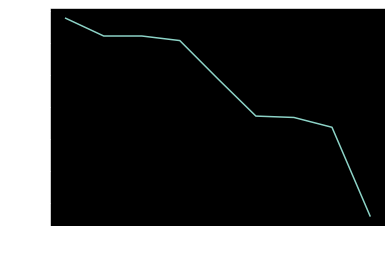

In [5]:
accuracies = []
ratios = np.array([i/10 for i in range(1, 10)])


for r in ratios:
    X_train, X_test, y_train, y_test = train_test_split(digits_set.data, digits_set.target, test_size=r, random_state=42)
    clf = LogisticRegression(max_iter=4000)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)

plt.style.use('dark_background')
plt.plot(ratios, accuracies)
plt.xlabel("Test size ratio")
plt.ylabel("Accuracy")
plt.show()

In [16]:
# Define the number of samples per class for the unbalanced dataset
samples_per_class = [600, 400, 0, 0, 0, 0, 0, 0, 0, 0]

# Initialize an empty list for the unbalanced dataset
unbalanced_data = []
size = 0
# Loop over the labels
for label in range(10):
    # Extract the indices of the samples for the current label
    indices = np.where(digits_set.target == label)[0]

    # Select a random subset of the samples for the current label
    subset_size = min(samples_per_class[label], len(indices))
    subset_indices = np.random.choice(indices, size=subset_size, replace=False)
   
    # Add the selected samples to the unbalanced dataset
    unbalanced_data.append(digits_set.data[subset_indices])
    
# Stack the unbalanced dataset into a single array
unbalanced_data = np.vstack(unbalanced_data)

# Create the target vector for the unbalanced dataset
unbalanced_target = np.zeros(1000, dtype=np.int64)
unbalanced_target[0:600] = 0
unbalanced_target[600:1000] = 1
display(unbalanced_target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,